<a href="https://colab.research.google.com/github/EUsanjeev18/Jupyter-first/blob/main/PYTORCH_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [ ]:
 weight = 0.7
 bias = 0.3
 start = 0
 end = 1
 step = 0.02
 X = torch.arange(start,end,step).unsqueeze(dim  = 1)
 y = weight*X + bias

 X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X)

50

In [ ]:
len(y)

50

In [ ]:
train_split = int(0.8*len(X))
train_split

40

In [ ]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype = torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x + bias



In [ ]:
torch.manual_seed(42)
model_0 =  LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

###Building a Trainig loop in pytorch

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
        test_pred = model_0(X_test)

    # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.14169074594974518 | Test loss: 0.3198745846748352
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1288]))])
Epoch: 10 | Loss: 0.12648078799247742 | Test loss: 0.28516465425491333
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.1288]))])
Epoch: 20 | Loss: 0.11127082258462906 | Test loss: 0.25045472383499146
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.1288]))])
Epoch: 30 | Loss: 0.0960608422756195 | Test loss: 0.21574480831623077
OrderedDict([('weights', tensor([0.4576])), ('bias', tensor([0.1288]))])
Epoch: 40 | Loss: 0.08085088431835175 | Test loss: 0.1810348629951477
OrderedDict([('weights', tensor([0.4966])), ('bias', tensor([0.1288]))])
Epoch: 50 | Loss: 0.06564091145992279 | Test loss: 0.14632496237754822
OrderedDict([('weights', tensor([0.5356])), ('bias', tensor([0.1288]))])
Epoch: 60 | Loss: 0.050430942326784134 | Test loss: 0.11161501705646515
OrderedDict([('weights', tensor([0.5746])), ('bias', tensor([0.1288]

In [ ]:
with torch.no_grad():
  y_pred_new = model_0(X_test)

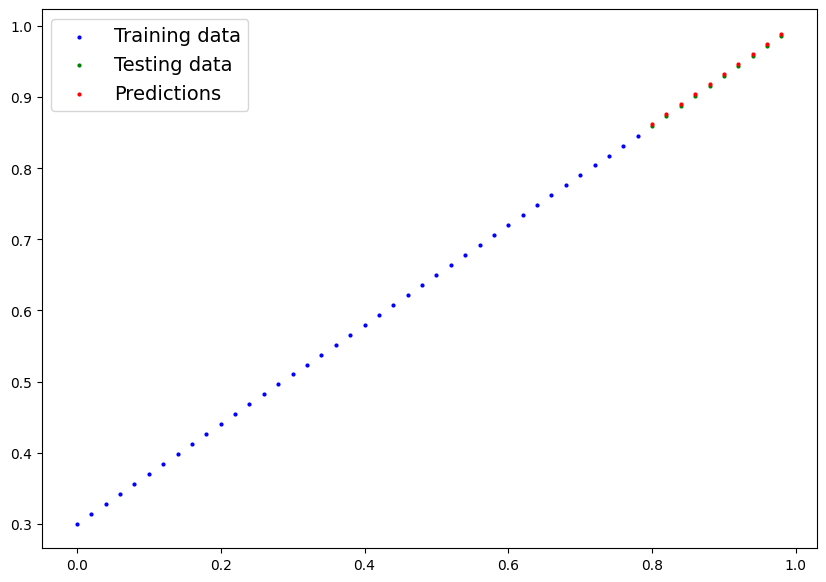

In [ ]:
plot_predictions(predictions = y_pred_new);

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = "True",exist_ok = True)
MODEL_NAME = "01_pytorch.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch.pth')

In [ ]:
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

In [1]:
ls -l models

ls: cannot access 'models': No such file or directory
